# Notebook Maestro "00"

## Este proyecto propone un modelo que mejora la estimación de la hora de entrega de un producto comprado vía comercio web. 

Objetivos: Lograr la mejora de un modelo existente, con objeto de diferenciarse de la competencia y fidelizar al cliente final.

Obejtivos Específicos:
- Analizar el error del modelo actual.
- Generar un modelo alternativo que desafíe al actualmente utilizado.
- Crear una estrategia que logre cumplir la promesa.

Equipo: 
- Líder del Equipo y Aseguramiento de Calidad: Jorge Hoffmann 
- Ingeniero de Modelamiento y Visualización de Datos: Cristián Pérez
- Analista de Datos: Mauricio Gómez    
- Documentación y Aseguramiento de Calidad: Constanza Gajardo. 

Se proponen 5 notebook Jupyter que son invocados desde el presente archivo Maestro "00". Alternativamente, se presenta un notebook maestro agrupado:

- 01: Análisis Descriptivo Preliminar: Inspección visual de datos, considerando que estos fueron entregados en 4 archivos Excel que detallan característias de la tienda, del comprador, del producto y de la orden de compra.
- 02: Limpieza y Transformación de datos:De especial relevancia es la normalización y ajuste de valores de latitud y longitud en el archivo "Purchase Order".
- 03: Unión de datos: Se genera un dataset, se eliminan datos perdidos. 
- 04: Ingeniería de Datos: Se calculan distancias, se obtienen gráficos que describen el comportamiento de órdenes y entregas. Se aprecia el error del modelo base.
- 05: Aplicación de Modelos: Se seleccionan los atributos útiles para la modelación de un nuevo modelo. Se aplica modelo "ElasticNetCV", "SGDRegressor", "GradientBoostRegressor" 

### Analisis descriptivo preliminar
Es utilizado para realizar una inspección visual preliminar de los set de datos


Estructura del dataset: purchase_order

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7295 entries, 0 to 7294
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   order_id         7295 non-null   object
 1   lat              7295 non-null   object
 2   lng              7295 non-null   object
 3   dow              7295 non-null   int64 
 4   promised_time    7295 non-null   object
 5   actual_time      7295 non-null   object
 6   on_demand        7295 non-null   bool  
 7   picker_id        7295 non-null   object
 8   driver_id        7295 non-null   object
 9   store_branch_id  7295 non-null   object
 10  total_minutes    6543 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 577.2+ KB

Estructura del dataset: product_order

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120876 entries, 0 to 120875
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  -----

,order_id,lat,lng,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes
0,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,13:00:00,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800.861
1,0d37a1eea001f01b40232ffd496ff663,18.177.712.202.580.300,-10.035.705.073.096.900,2,13:00:00,10:28:10,False,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599.732
2,528428e9b9eb5d3bd0dbdd8da692b087,1.826.683.205.404.410,-10.031.755.280.890.600,2,11:00:00,10:40:50,False,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458.001


,order_id,product_id,quantity,quantity_found,buy_unit
0,bdfc44fb525986b7bab8c589fc47e853,ab9757d9892b0e83ab3a1c1af0c84c52,0.75,0.155,KG
1,bdfc44fb525986b7bab8c589fc47e853,f1f042251bf634d44f338fbaf13b16e4,0.3,0.400,KG
2,bdfc44fb525986b7bab8c589fc47e853,0630d47440965509b0b3f80fd1b3578f,1,1.000,UN


,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
0,087ab65ceca40dbef697f585dc159d5d,ADVANCED,0.8610,1.64,1.00,4.48
1,645973c41314d763b58dc2bceeeeffc9,INTERMEDIATE,0.8337,2.83,0.96,4.79
2,82810715fdda44962e7e422015ea1f32,ADVANCED,0.8681,1.27,0.88,4.84


,store_branch_id,store,lat,lng
0,cf0895f1e3beb8164f0a86e6f940ae56,c0b93cf93cf854981b8d6bd849eec4b0,18.160.308.413.602.800,-10.026.067.265.111.100
1,3ddd4c29cab4178d89d549c6ba65c236,044d56734d20e04984d846dade6d39f3,1.827.282.968.914.450,-10.031.881.435.593.900
2,e9763f24fd46d0b9e52d423207a87c3c,452ae015bf846e1d2932b7ea15720d64,18.273.494.015.704.800,-10.031.958.539.978.200


Medidas descriptivas de variables float64 e int64

      count   mean    std  min  25%  50%  75%  max
dow  7295.0  2.783  1.742  0.0  1.0  3.0  4.0  6.0

Freecuencia de variables distintas a float64 e int64

Nombre de variable: order_id, frecuencia: 
                                  total  percent
6abd5e28d01b7c733fe37485294235dc      1      0.0
e7449e7a2c2cbe3e71eb4c313ca06650      1      0.0
a831d42a12d9e5581f0ae8dfd8eefc69      1      0.0
57e14a67d26f47ce05af2fe2e537d556      1      0.0
7f57e5a0e6fdd748e449e700c7ef5c19      1      0.0
...                                 ...      ...
93fa6384f84da0d72f96b10b8bae6820      1      0.0
b9a01a2c738217bd3271293294004d9e      1      0.0
62642a917e9e2af4f123dc5660705af9      1      0.0
568bdbca1d3cdafc75ab3f20da2155ba      1      0.0
7ffa2d60aea99143b28564d737ca4b2b      1      0.0

[7295 rows x 2 columns]

Nombre de variable: lat, frecuencia: 
                        total  percent
1.822.114.109.606.680       1      0.0
18.288.950.840.081.

,order_id,product_id,quantity,quantity_found,buy_unit
total_missing,0.0,0.0,0.0,0.0,0.0
percent_missing,0.0,0.0,0.0,0.0,0.0


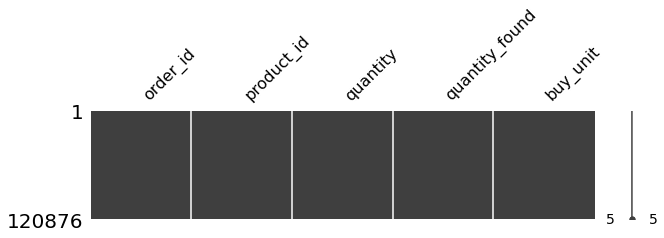

El atributo dow contiene los valores 0, 1, 2, 3, 4, 5, 6.
Estos son consistentes con la informacion entregada.
Existen 7079 ordenes donde se presenta el mismo picker_id y driver_id, a falta de un dataset de driver_id, podemos inferir que la misma persona que prepara el pedido realiza el reparto.
Existen 216 ordenes donde se presenta distinto picker_id y driver_id, podemos inferir que son distintas personas, una prepara el pedido y otra realiza el reparto.
Existen 189 picker_id y driver_id unicos y distintos que perticipan en el mismo pedido
Existen 594 picker_id y driver_id unicos e iguales que perticipan en el mismo pedido

 revision dataset: purchase_order


,order_id,lat,lng,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes,same_picker_shopper
total_missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,752.000,0.0
percent_missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.308,0.0


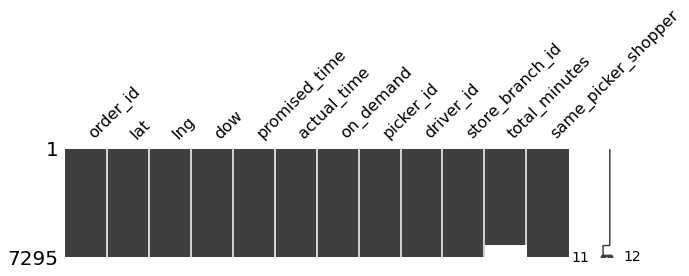


 revision dataset: store


,store_branch_id,store,lat,lng
total_missing,0.0,0.0,0.0,0.0
percent_missing,0.0,0.0,0.0,0.0


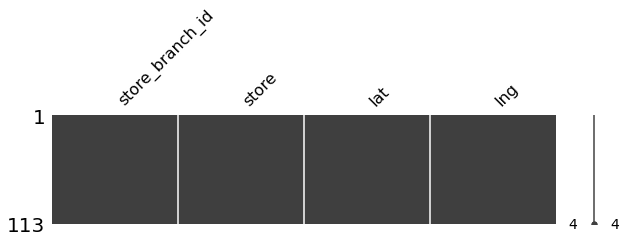

Se pueden apreciar las siguientes categorias: ADVANCED, INTERMEDIATE, REVIEW, BEGINNER


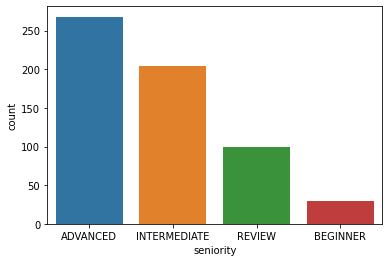


 revision dataset: shopper


,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
total_missing,0.0,0.0,36.0,0.0,6.0,34.000
percent_missing,0.0,0.0,6.0,0.0,1.0,5.667


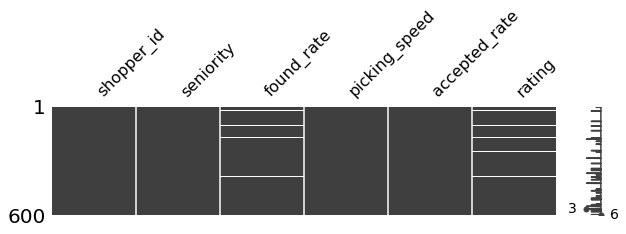

NameError: name 'foo' is not defined

In [1]:
%run 01_AnalisisDescriptivoPreeliminar.ipynb

### Limpieza y transformacion de datos
Es utilizado para realizar: <br>
- Tratamiento de valores perdidos <br>
- Tratamiento de valores outliers <br>
- Normalizacion de datos con problema de estructura o formato <br>

In [ ]:
%run 02_cleanTransform.ipynb

### Consolidación de dataset
Preparación de datos para modelamiento

In [ ]:
%run 03_joinDataset.ipynb

### Análisis descriptivo
Es utilizado para realizar una inspección visual preliminar de los set de datos posterior a la normalización y consolidación de datos

In [ ]:
%run 04_Feature_Engineering_AnalisisDescriptivo.ipynb

### Modelación
Selecciona atributos útiles para la modelación de: "ElasticNetCV", "SGDRegressor", "GradientBoostRegressor"

In [ ]:
%run 05_Modelacion.ipynb